In [1]:
import sklearn
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\sadha\OneDrive\Desktop\PROJECTS\Financial-Fraud-Detection\Fin-Fraud-dataset.csv")

In [3]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [4]:
data['isFraud'] = data['isFraud'].astype(int)

In [5]:
data.isnull().sum().max()

0

C:\Users\sadha\AppData\Local\Temp\ipykernel_32532\2019323153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="isFraud", data=data, palette="Set2")


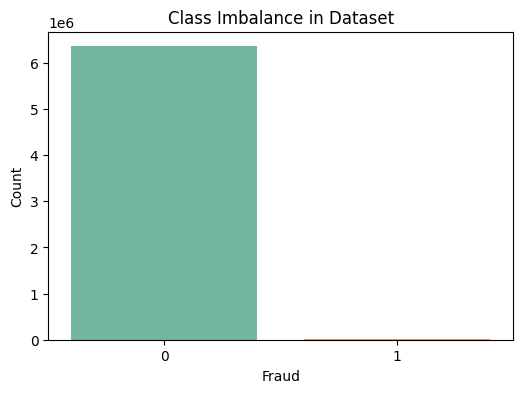

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x="isFraud", data=data, palette="Set2")
plt.title("Class Imbalance in Dataset")
plt.xlabel("Fraud")
plt.ylabel("Count")
plt.show()

C:\Users\sadha\AppData\Local\Temp\ipykernel_32532\2178903984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=data, order=data['type'].value_counts().index, palette="Set3")


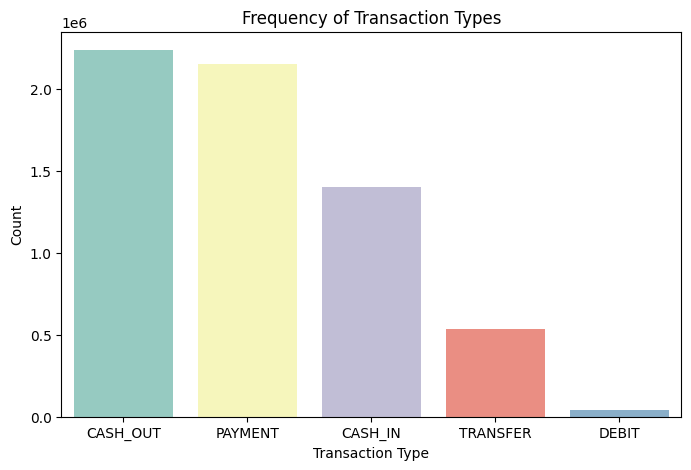

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x="type", data=data, order=data['type'].value_counts().index, palette="Set3")
plt.title("Frequency of Transaction Types")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()


C:\Users\sadha\AppData\Local\Temp\ipykernel_32532\2867621889.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=data[data['isFraud'] == 1], order=data['type'].value_counts().index, palette="Set1")


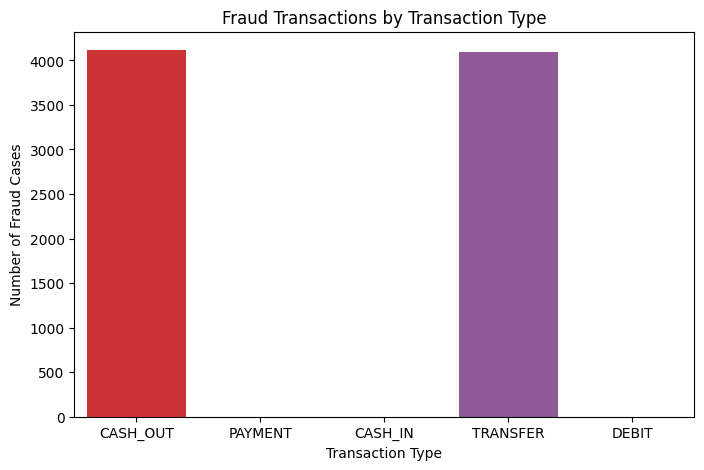

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x="type", data=data[data['isFraud'] == 1], order=data['type'].value_counts().index, palette="Set1")
plt.title("Fraud Transactions by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Number of Fraud Cases")
plt.show()


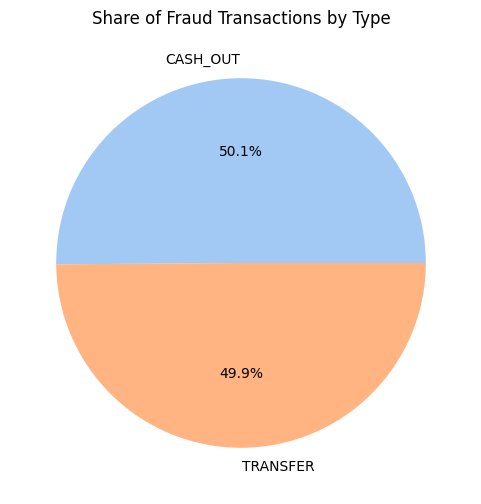

In [9]:
fraud_counts = data[data['isFraud'] == 1]['type'].value_counts()

plt.figure(figsize=(6,6))
fraud_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Share of Fraud Transactions by Type")
plt.ylabel("")
plt.show()


In [10]:
data = data.loc[data['type'].isin(['CASH_OUT','TRANSFER']),:]
print('The new data now has ', len(data), ' transactions.')

The new data now has  2770409  transactions.


In [11]:
print(sum(data['amount']<0))

0


In [12]:
print(sum(data['amount']==0))

16


In [13]:
data = data.loc[data['amount']>0,:]

In [14]:
print((data['oldbalanceOrg']==0).mean()*100)

47.23394839649104


In [15]:
print((data['newbalanceDest']==0).mean()*100)

0.5989402947524052


In [16]:
originator_check = data['newbalanceOrig'] == (data['oldbalanceOrg'] - data['amount'])
destination_check = data['newbalanceDest'] == (data['oldbalanceDest'] + data['amount'])


originator_incorrect = (1 - originator_check.mean()) * 100
destination_incorrect = (1 - destination_check.mean()) * 100


print(f"% transactions where originator balances are not accurately captured: {originator_incorrect:.2f}")
print(f"% transactions where destination balances are not accurately captured: {destination_incorrect:.2f}")


% transactions where originator balances are not accurately captured: 93.72
% transactions where destination balances are not accurately captured: 42.09


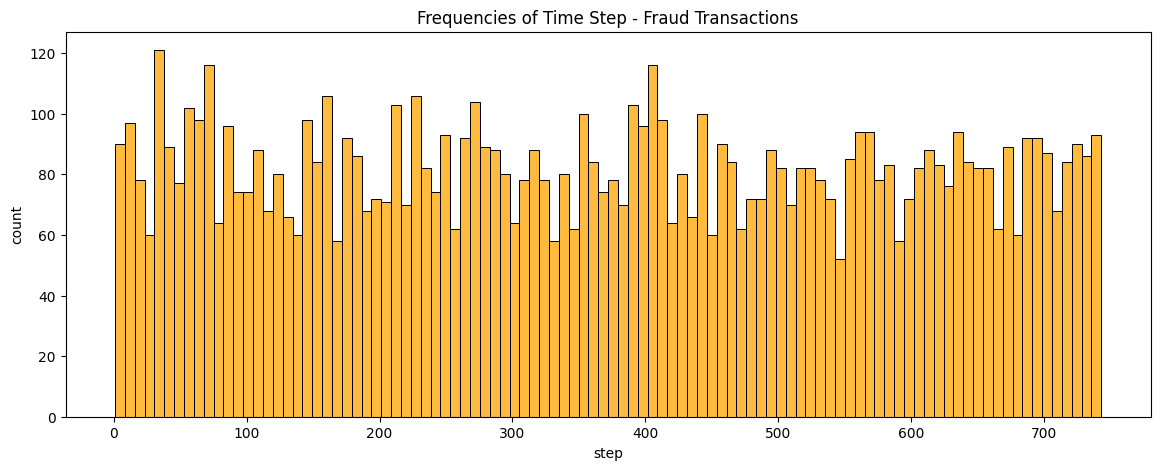

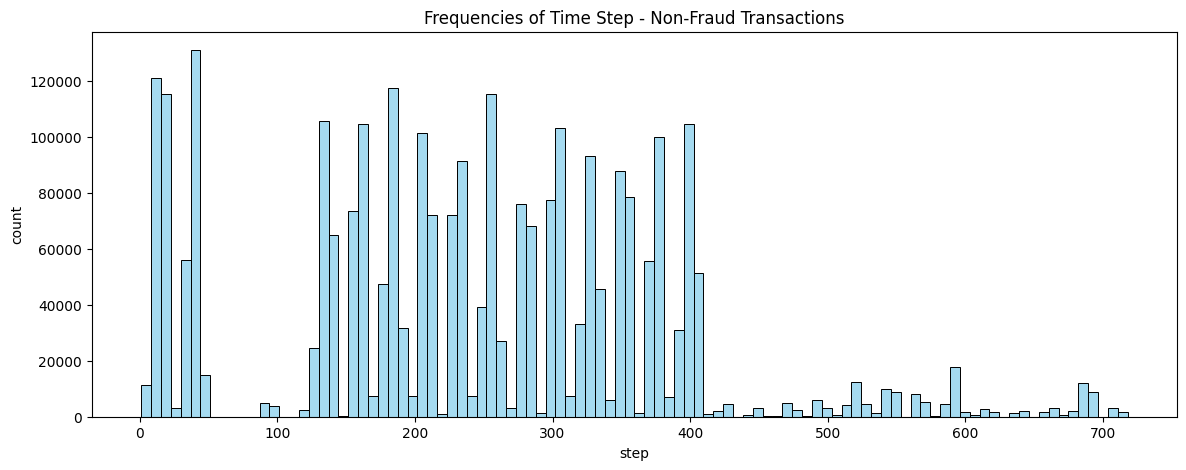

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud transactions by time step
plt.figure(figsize=(14,5))
sns.histplot(data[data['isFraud']==1]['step'], bins=100, kde=False, color="orange")
plt.title("Frequencies of Time Step - Fraud Transactions")
plt.xlabel("step")
plt.ylabel("count")
plt.show()

# Non-Fraud transactions by time step
plt.figure(figsize=(14,5))
sns.histplot(data[data['isFraud']==0]['step'], bins=100, kde=False, color="skyblue")
plt.title("Frequencies of Time Step - Non-Fraud Transactions")
plt.xlabel("step")
plt.ylabel("count")
plt.show()


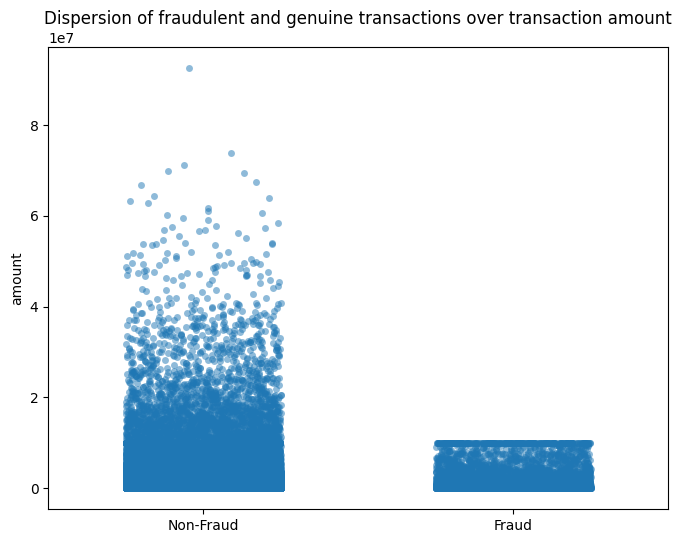

In [18]:
plt.figure(figsize=(8,6))
sns.stripplot(x="isFraud", y="amount", data=data, jitter=0.25, alpha=0.5)
plt.xticks([0,1], ["Non-Fraud","Fraud"])
plt.title("Dispersion of fraudulent and genuine transactions over transaction amount")
plt.xlabel("")
plt.ylabel("amount")
plt.show()


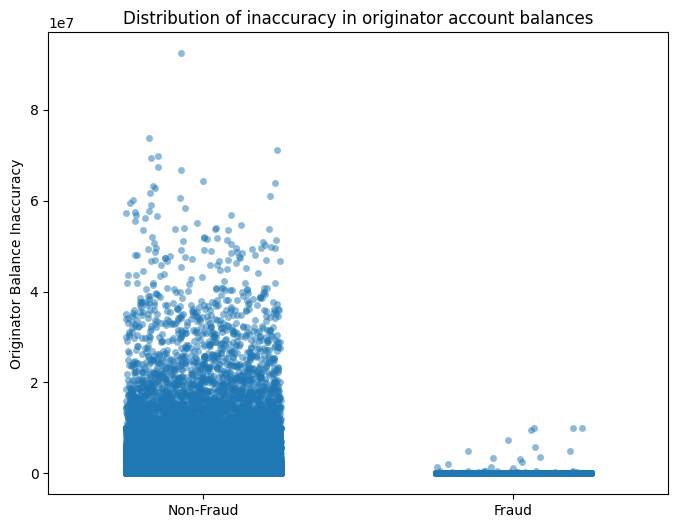

In [19]:
# Originator balance inaccuracy
data['origBalance_inacc'] = data['newbalanceOrig'] - (data['oldbalanceOrg'] - data['amount'])

plt.figure(figsize=(8,6))
sns.stripplot(x="isFraud", y="origBalance_inacc", data=data, jitter=0.25, alpha=0.5)
plt.xticks([0,1], ["Non-Fraud","Fraud"])
plt.title("Distribution of inaccuracy in originator account balances")
plt.xlabel("")
plt.ylabel("Originator Balance Inaccuracy")
plt.show()


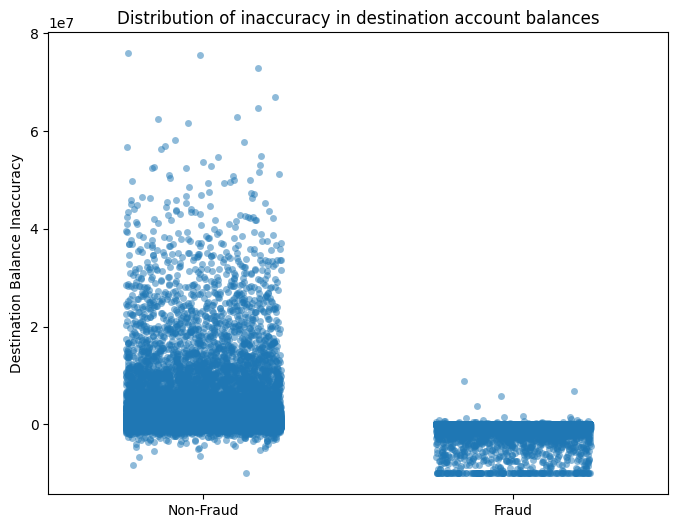

In [20]:
# Destination balance inaccuracy
data['destBalance_inacc'] = data['newbalanceDest'] - (data['oldbalanceDest'] + data['amount'])

plt.figure(figsize=(8,6))
sns.stripplot(x="isFraud", y="destBalance_inacc", data=data, jitter=0.25, alpha=0.5)
plt.xticks([0,1], ["Non-Fraud","Fraud"])
plt.title("Distribution of inaccuracy in destination account balances")
plt.xlabel("")
plt.ylabel("Destination Balance Inaccuracy")
plt.show()


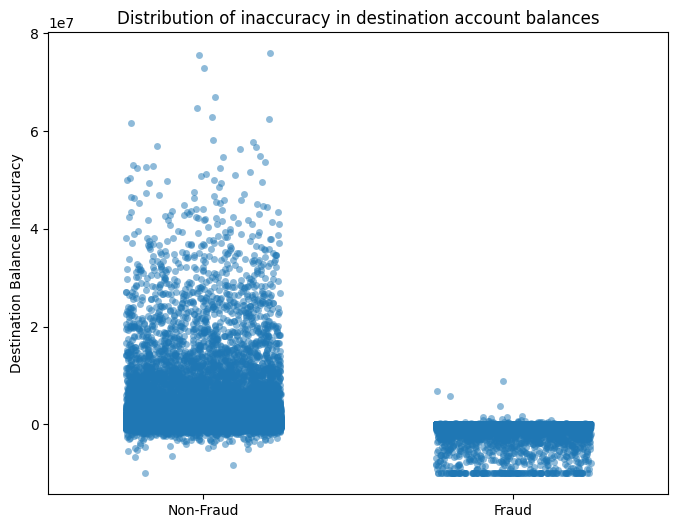

In [21]:
# Destination balance inaccuracy
data['destBalance_inacc'] = data['newbalanceDest'] - (data['oldbalanceDest'] + data['amount'])

plt.figure(figsize=(8,6))
sns.stripplot(x="isFraud", y="destBalance_inacc", data=data, jitter=0.25, alpha=0.5)
plt.xticks([0,1], ["Non-Fraud","Fraud"])
plt.title("Distribution of inaccuracy in destination account balances")
plt.xlabel("")
plt.ylabel("Destination Balance Inaccuracy")
plt.show()


C:\Users\sadha\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


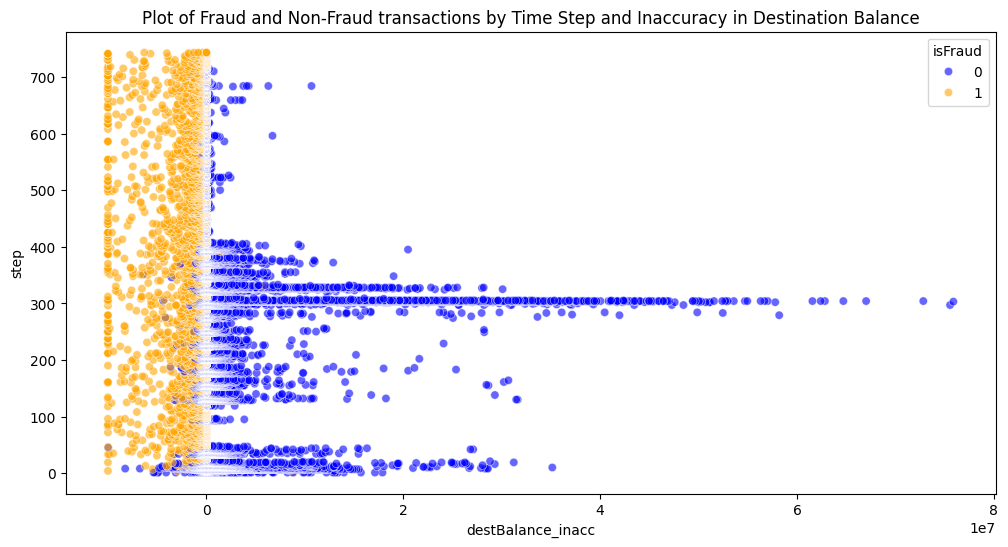

In [22]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="destBalance_inacc", y="step", hue="isFraud", data=data, alpha=0.6, palette={0:"blue",1:"orange"})
plt.title("Plot of Fraud and Non-Fraud transactions by Time Step and Inaccuracy in Destination Balance")
plt.xlabel("destBalance_inacc")
plt.ylabel("step")
plt.show()


In [23]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [24]:
data = pd.get_dummies(data, columns=['type'], prefix=['type'])


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [26]:
std_scaler = StandardScaler()
data_scaled = pd.DataFrame(std_scaler.fit_transform(data.loc[:,~data.columns.isin(['isFraud'])]))
data_scaled.columns = data.columns[:-1]
data_scaled['isFraud'] = data['isFraud']


In [27]:
X = data_scaled.loc[:, data_scaled.columns != 'isFraud']
y = data_scaled.loc[:, data_scaled.columns == 'isFraud']
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X,y,test_size = 0.3, random_state = 0)
label_encoder = LabelEncoder()
y_train_original = label_encoder.fit_transform(y_train_original.values.ravel())
y_test_original = label_encoder.fit_transform(y_test_original.values.ravel())


In [28]:
train_pct = pd.Series(y_train_original).value_counts(normalize=True)[1]*100
test_pct  = pd.Series(y_test_original).value_counts(normalize=True)[1]*100

print(f"Class imbalance in train dataset: {train_pct:.3f}%")
print(f"Class imbalance in test dataset: {test_pct:.3f}%")


Class imbalance in train dataset: 0.088%
Class imbalance in test dataset: 0.084%


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

# Metric for evaluation
scr = 'recall'
accuracy_dict = {}

# Define models
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()

# Stratified 5-fold cross validation (to handle class imbalance)
skf = StratifiedKFold(5)


In [30]:
# Train Logistic Regression with cross-validation
sc_lr = cross_val_score(model_lr, X_train_original, y_train_original, cv=skf, scoring=scr)

print("Logistic Regression's average recall score across validation sets is:",
      round(sc_lr.mean() * 100, 2), "%")

# Fit on training data
model_lr.fit(X_train_original, y_train_original)

# Predictions
y_train_pred_lr = model_lr.predict(X_train_original)
y_test_pred_lr = model_lr.predict(X_test_original)

# Evaluation
print("TRAINING PERFORMANCE (Logistic Regression):")
print(classification_report(y_train_original, y_train_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_train_original, y_train_pred_lr))

print("\nTEST PERFORMANCE (Logistic Regression):")
print(classification_report(y_test_original, y_test_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test_original, y_test_pred_lr))


c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 140, in __call__
    score = scorer._score(
  File "c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py", line 2429, in recall_score
    _, r, _, _ = precision_recall_fscore_support

Logistic Regression's average recall score across validation sets is: nan %
TRAINING PERFORMANCE (Logistic Regression):


c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

              precision    recall  f1-score   support

           0       0.44      0.00      0.00    851099
           1       0.00      0.00      0.00      1712
           2       0.56      1.00      0.72   1086464

    accuracy                           0.56   1939275
   macro avg       0.33      0.33      0.24   1939275
weighted avg       0.51      0.56      0.40   1939275

Confusion Matrix:
 [[      7       0  851092]
 [      0       0    1712]
 [      9       0 1086455]]

TEST PERFORMANCE (Logistic Regression):


c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00    365013
           1       0.00      0.00      0.00       694
           2       0.56      1.00      0.72    465411

    accuracy                           0.56    831118
   macro avg       0.52      0.33      0.24    831118
weighted avg       0.75      0.56      0.40    831118

Confusion Matrix:
 [[     4      0 365009]
 [     0      0    694]
 [     0      0 465411]]


c:\Users\sadha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Train Random Forest with cross-validation
sc_rf = cross_val_score(model_rf, X_train_original, y_train_original, cv=skf, scoring=scr)

print("Random Forest's average recall score across validation sets is:",
      round(sc_rf.mean() * 100, 2), "%")

# Fit on training data
model_rf.fit(X_train_original, y_train_original)

# Predictions
y_train_pred_rf = model_rf.predict(X_train_original)
y_test_pred_rf = model_rf.predict(X_test_original)

# Evaluation
print("TRAINING PERFORMANCE (Random Forest):")
print(classification_report(y_train_original, y_train_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_train_original, y_train_pred_rf))

print("\nTEST PERFORMANCE (Random Forest):")
print(classification_report(y_test_original, y_test_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_original, y_test_pred_rf))
